# Proyecto del Día 10 - Dashboard de un Análisis Exploratorio de Datos con Seaborn

## Introducción
Este notebook tiene como objetivo demostrar cómo utilizar Seaborn para **crear visualizaciones complejas y atractivas para el análisis exploratorio de datos** utilizando el dataset de `diamonds`, pertenenciente a la librería **Seaborn** en Python. Este dashboard incluirá visualizaciones que muestren:
* relaciones estadísticas
* distribuciones de variables
* comparaciones entre categorías

El estudiante deberá:
1. Cargar el dataset `diamonds` de Seaborn
2. Realizar un **análisis exploratorio** preliminar para familiarizarse con los datos
3. Crear visualizaciones que incluyan:
    * Relaciones entre variables numéricas (por ejemplo, precio vs. peso en quilates)
    * Distribuciones de variables numéricas (por ejemplo, precio, peso en quilates)
    * Comparaciones de variables numéricas agrupadas por categorías (por ejemplo, calidad del corte)
4. Utilizar `jointplot()` para explorar relaciones específicas entre pares de variables, incluyendo información estadística adicional
5. Emplear `pairplot()` para visualizar las relaciones entre todas las variables numéricas del dataset de manera conjunta
6. Ajustar los estilos y temas de las visualizaciones para mejorar la estética y legibilidad
7. Interpretar los gráficos generados, destacando hallazgos interesantes sobre los datos

No dejes de usar tu creatividad, explora, diviértete y en el medio de todo eso, aprende.

1. Cargar el dataset diamonds de Seaborn

In [1]:
import seaborn as sns
import pandas as pd

sns.set_theme()
diamonds = sns.load_dataset('diamonds')

2. Realizar un análisis exploratorio preliminar para familiarizarse con los datos

In [3]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [8]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


3. Crear visualizaciones que incluyan:
- Relaciones entre variables numéricas (por ejemplo, precio vs. peso en quilates)
- Distribuciones de variables numéricas (por ejemplo, precio, peso en quilates)
- Comparaciones de variables numéricas agrupadas por categorías (por ejemplo, calidad del corte)

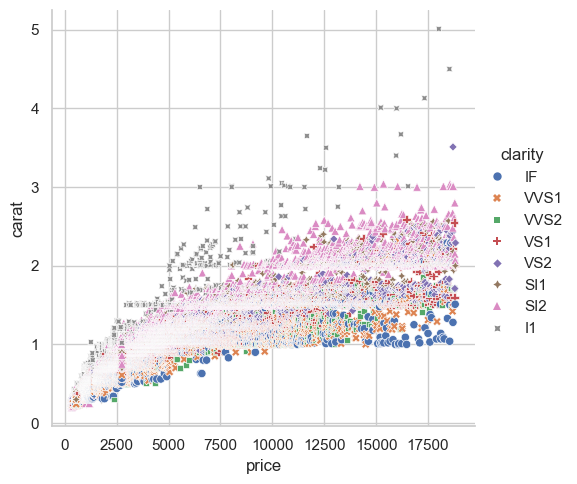

In [17]:
sns.relplot(data=diamonds,  # Asegúrate de que el nombre del dataset sea correcto
            x='price',
            y='carat',
           hue = 'clarity',
            style='clarity',
           markers=True)

In [ ]:
# En base al grafico nos podemos dar cuenta que los quilates más pesados tienen generalmente un precio más alto, además, VS2 es el que destaca por ser 
# el de mayor quilate y mayor precio, mientras que el IF destaca por tener menor quilate y rondar todos los precios.

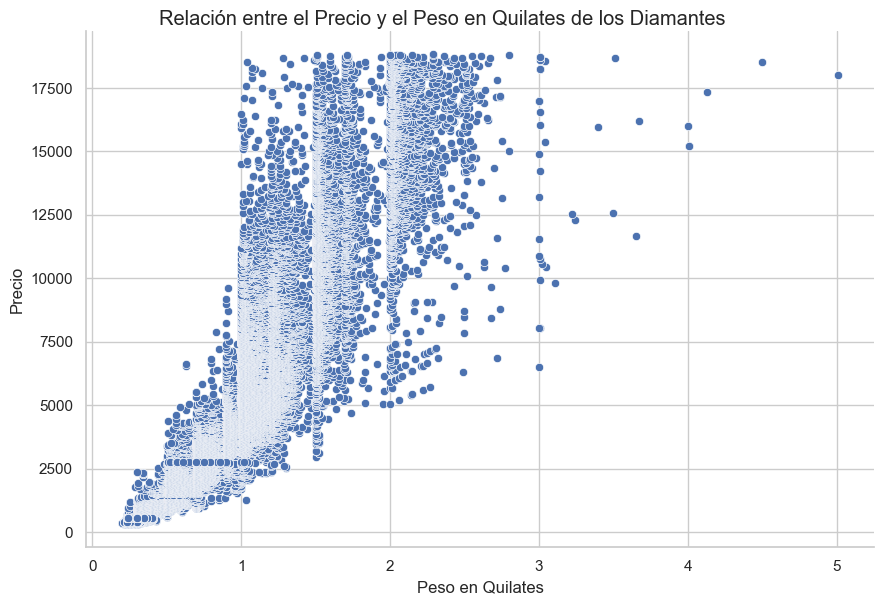

In [6]:
# Configuración para mejorar la estética de las gráficas
sns.set(style="whitegrid")

# Creando el gráfico de relación con relplot
g = sns.relplot(data=diamonds,
                x="carat",
                y="price",
                kind="scatter",
                height=6,
                aspect=1.5)

# Estableciendo título
g.fig.suptitle('Relación entre el Precio y el Peso en Quilates de los Diamantes',
               va='baseline',
               ha='center')

# Estableciendo títulos para las etiquetas de ejes
g.set_axis_labels('Peso en Quilates', 'Precio');

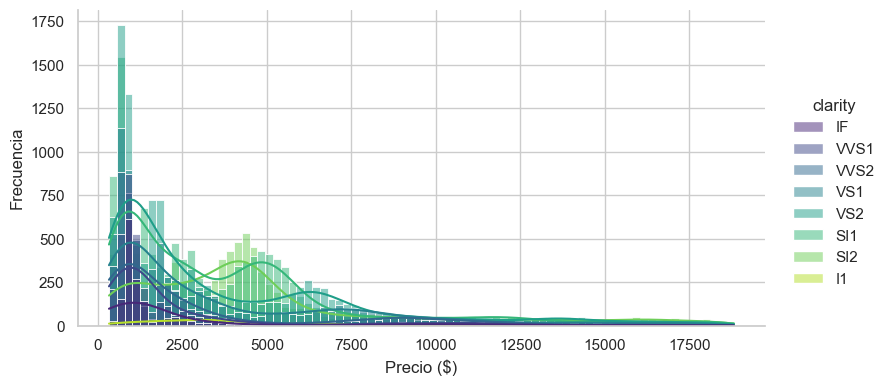

In [23]:
g = sns.displot(data=diamonds,
            x='price',  # Variable numérica
            hue='clarity',  # Colorear por claridad
            kind='hist',  # Tipo de gráfico: histograma
            kde=True,  # Añadir curva KDE
            palette='viridis',  # Paleta de colores
            height=4,  # Altura de la figura
            aspect=2)  # Relación de aspecto
g.set_axis_labels('Precio ($)', 'Frecuencia');

In [ ]:
# Aca podemos observar los distintos precios de los diamantes y su frecuencia, dividos en su claridad
#En el rango de precios 0-2500, puede haber una alta frecuencia de diamantes con claridad SI1 o SI2
#Aca podemos ver que por ejemplo VS2 alcanza numeros arriba de 1500-1750 con precios entre 0 y 2500
#es decir, esa cantidad de precios alcanza esos precios
#es decir, es mas frecuente los precios BAJOS en cuestion de cantidad

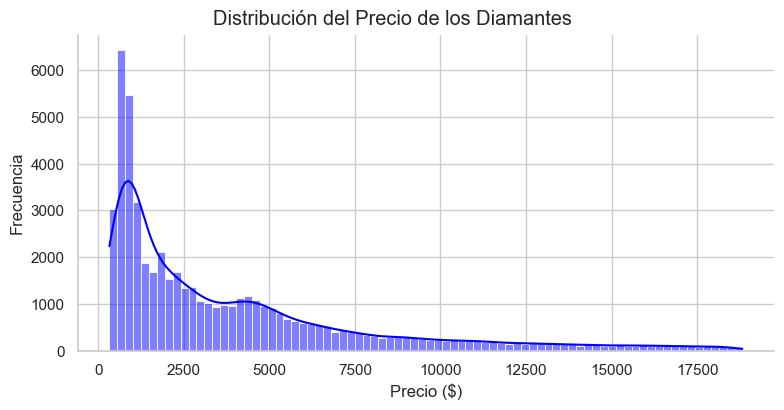

In [7]:
# Creando la visualización de la distribución del precio
g = sns.displot(data=diamonds,
                x="price",
                kind="hist",
                kde=True,
                color="blue",
                height=4,
                aspect=2)
g.fig.suptitle('Distribución del Precio de los Diamantes',
               va='baseline',
               ha='center')
g.set_axis_labels('Precio ($)', 'Frecuencia');

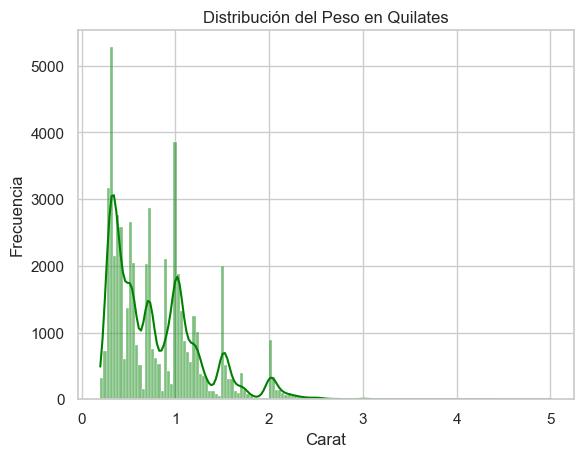

In [9]:
# Creando la visualización de la distribución del peso en quilates
g = sns.histplot(data=diamonds,
                 x="carat",
                 kde=True,
                 color="green")
g.set_title('Distribución del Peso en Quilates')
g.set(xlabel='Carat', ylabel='Frecuencia');

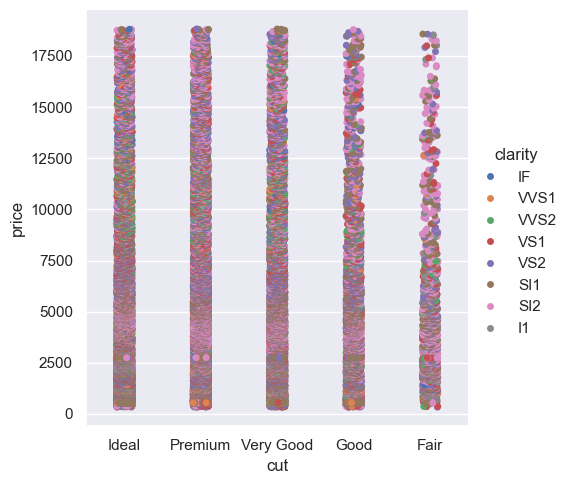

In [3]:
sns.catplot(data=diamonds,  # Asegúrate de que el nombre del dataset sea correcto
            kind = 'strip',
            x='cut',
            y='price',
           hue = 'clarity')

In [ ]:
# Aca comparamos corte con precio, viendo que todos alcazan distintos precios, pero que desde el very good, va disminuyendo la cantidad de los distintos clarity 

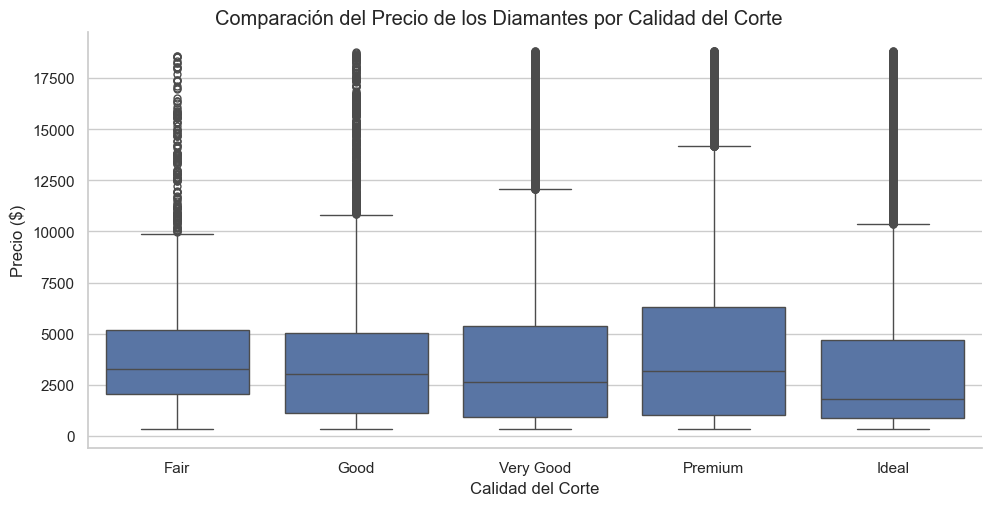

In [11]:
# Creando el gráfico catplot de tipo 'box'
g = sns.catplot(data=diamonds,
                kind="box",
                x="cut",
                y="price",
                height=5,
                aspect=2,
                order=["Fair", "Good", "Very Good", "Premium", "Ideal"])

# Estableciendo título
g.fig.suptitle('Comparación del Precio de los Diamantes por Calidad del Corte',
               va='baseline',
               ha='center')

# Estableciendo etiquetas de ejes
g.set_axis_labels("Calidad del Corte",
                  "Precio ($)");

In [ ]:
# Se espera que Premium tengo precios más altos, le sigue Very Good, Fair, Good y despues Ideal
# Tambien se pueden observar las medianas, en fin

4. Utilizar jointplot() para explorar relaciones específicas entre pares de variables, incluyendo información estadística adicional

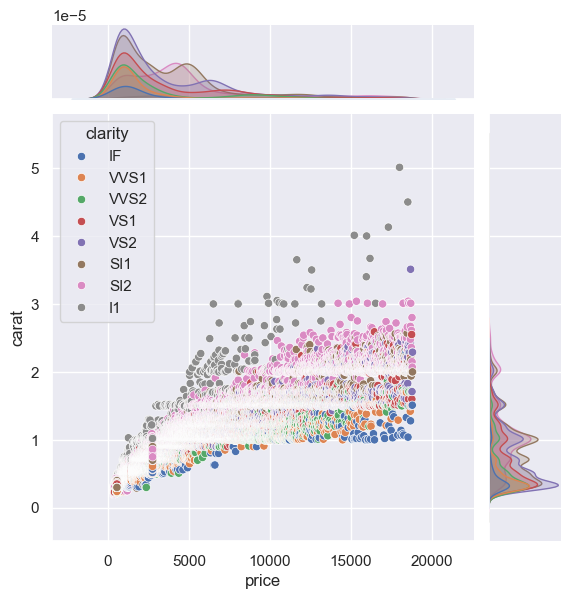

In [7]:
sns.jointplot(data=diamonds, 
              x='price', 
              y='carat', 
              kind='scatter', 
              hue='clarity')

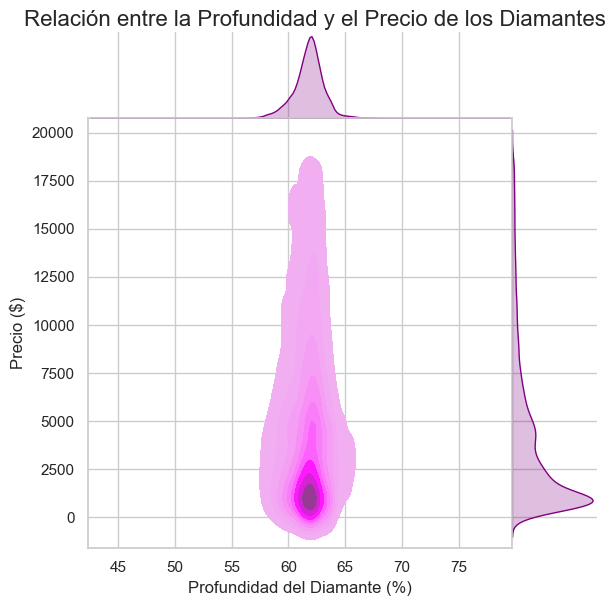

In [13]:
# Utilizando jointplot para visualizar la relación entre 'depth' y 'price' con un gráfico de densidad kernel
g = sns.jointplot(data=diamonds,
                  x="depth",
                  y="price",
                  kind="kde",
                  fill=True,
                  space=0,
                  color="purple")

# Cambiando las etiquetas de los ejes
g.set_axis_labels("Profundidad del Diamante (%)",
                  "Precio ($)")

# Mejorando el título
g.fig.suptitle('Relación entre la Profundidad y el Precio de los Diamantes',
               va='baseline',
               ha='center',
               fontsize=16);

In [ ]:
# La profundidad de diamante esta entre 60 y 65
# Los precios más bajos pueden llegar a tener una profundidad menor a 60 
# Los precios más altos se acercan a un punto medio entre 60 y 65

5. Emplear pairplot() para visualizar las relaciones entre todas las variables numéricas del dataset de manera conjunta

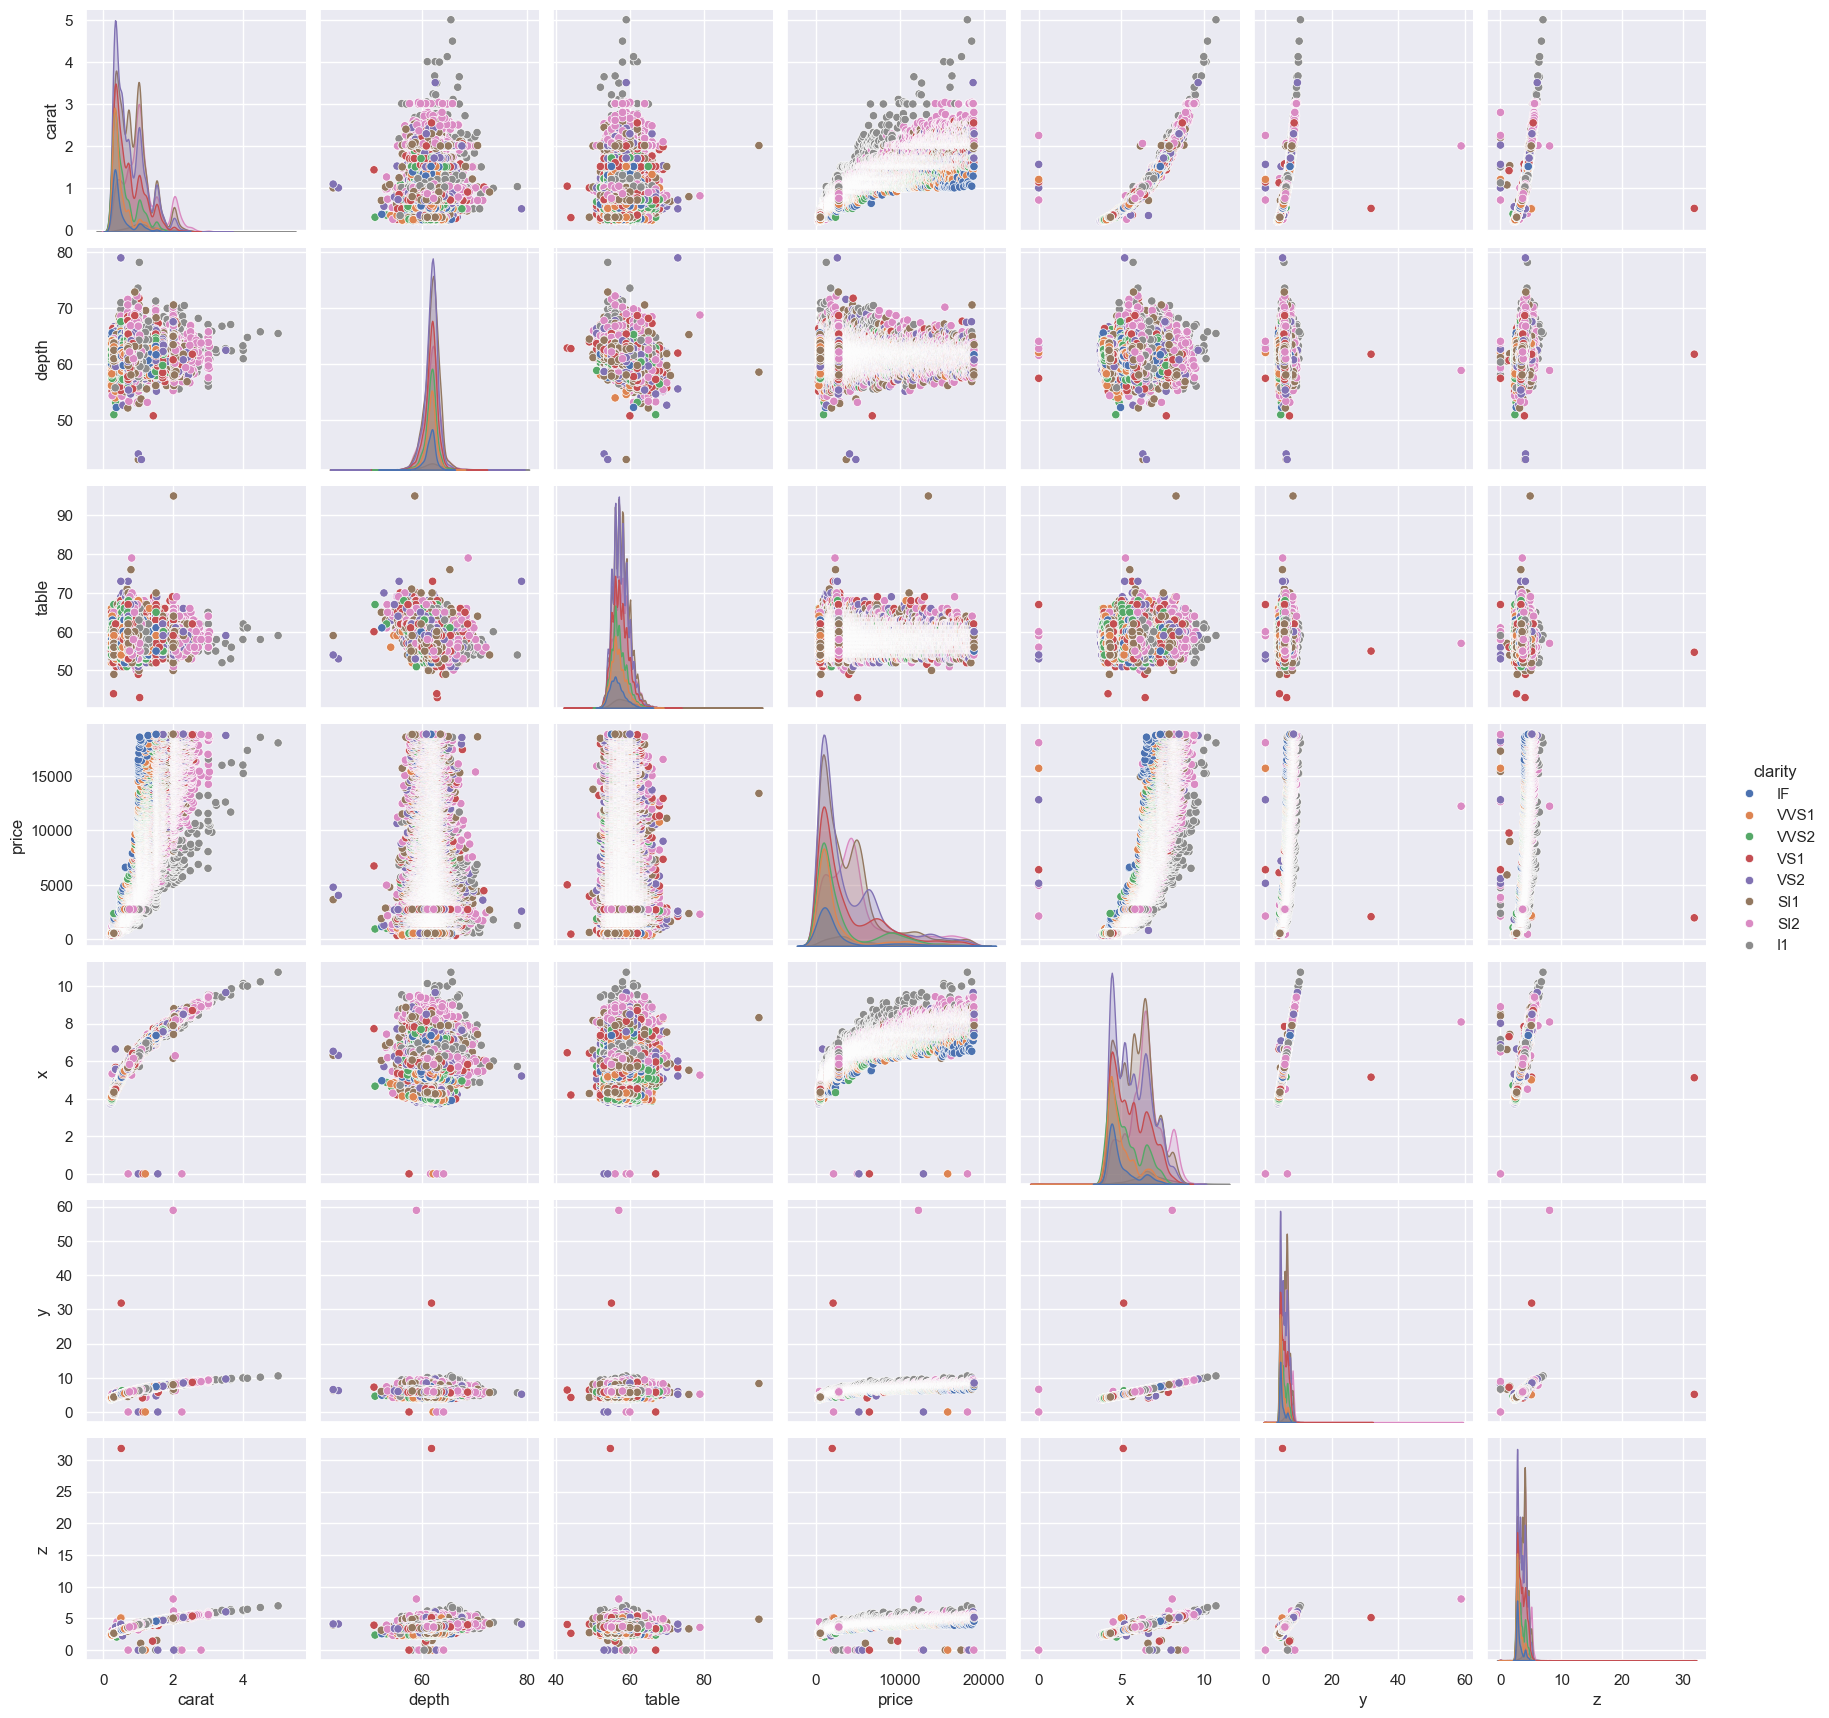

In [2]:
sns.pairplot(data=diamonds,
             hue='clarity')

In [ ]:
#aca hay muchos graficos REPETIDOS

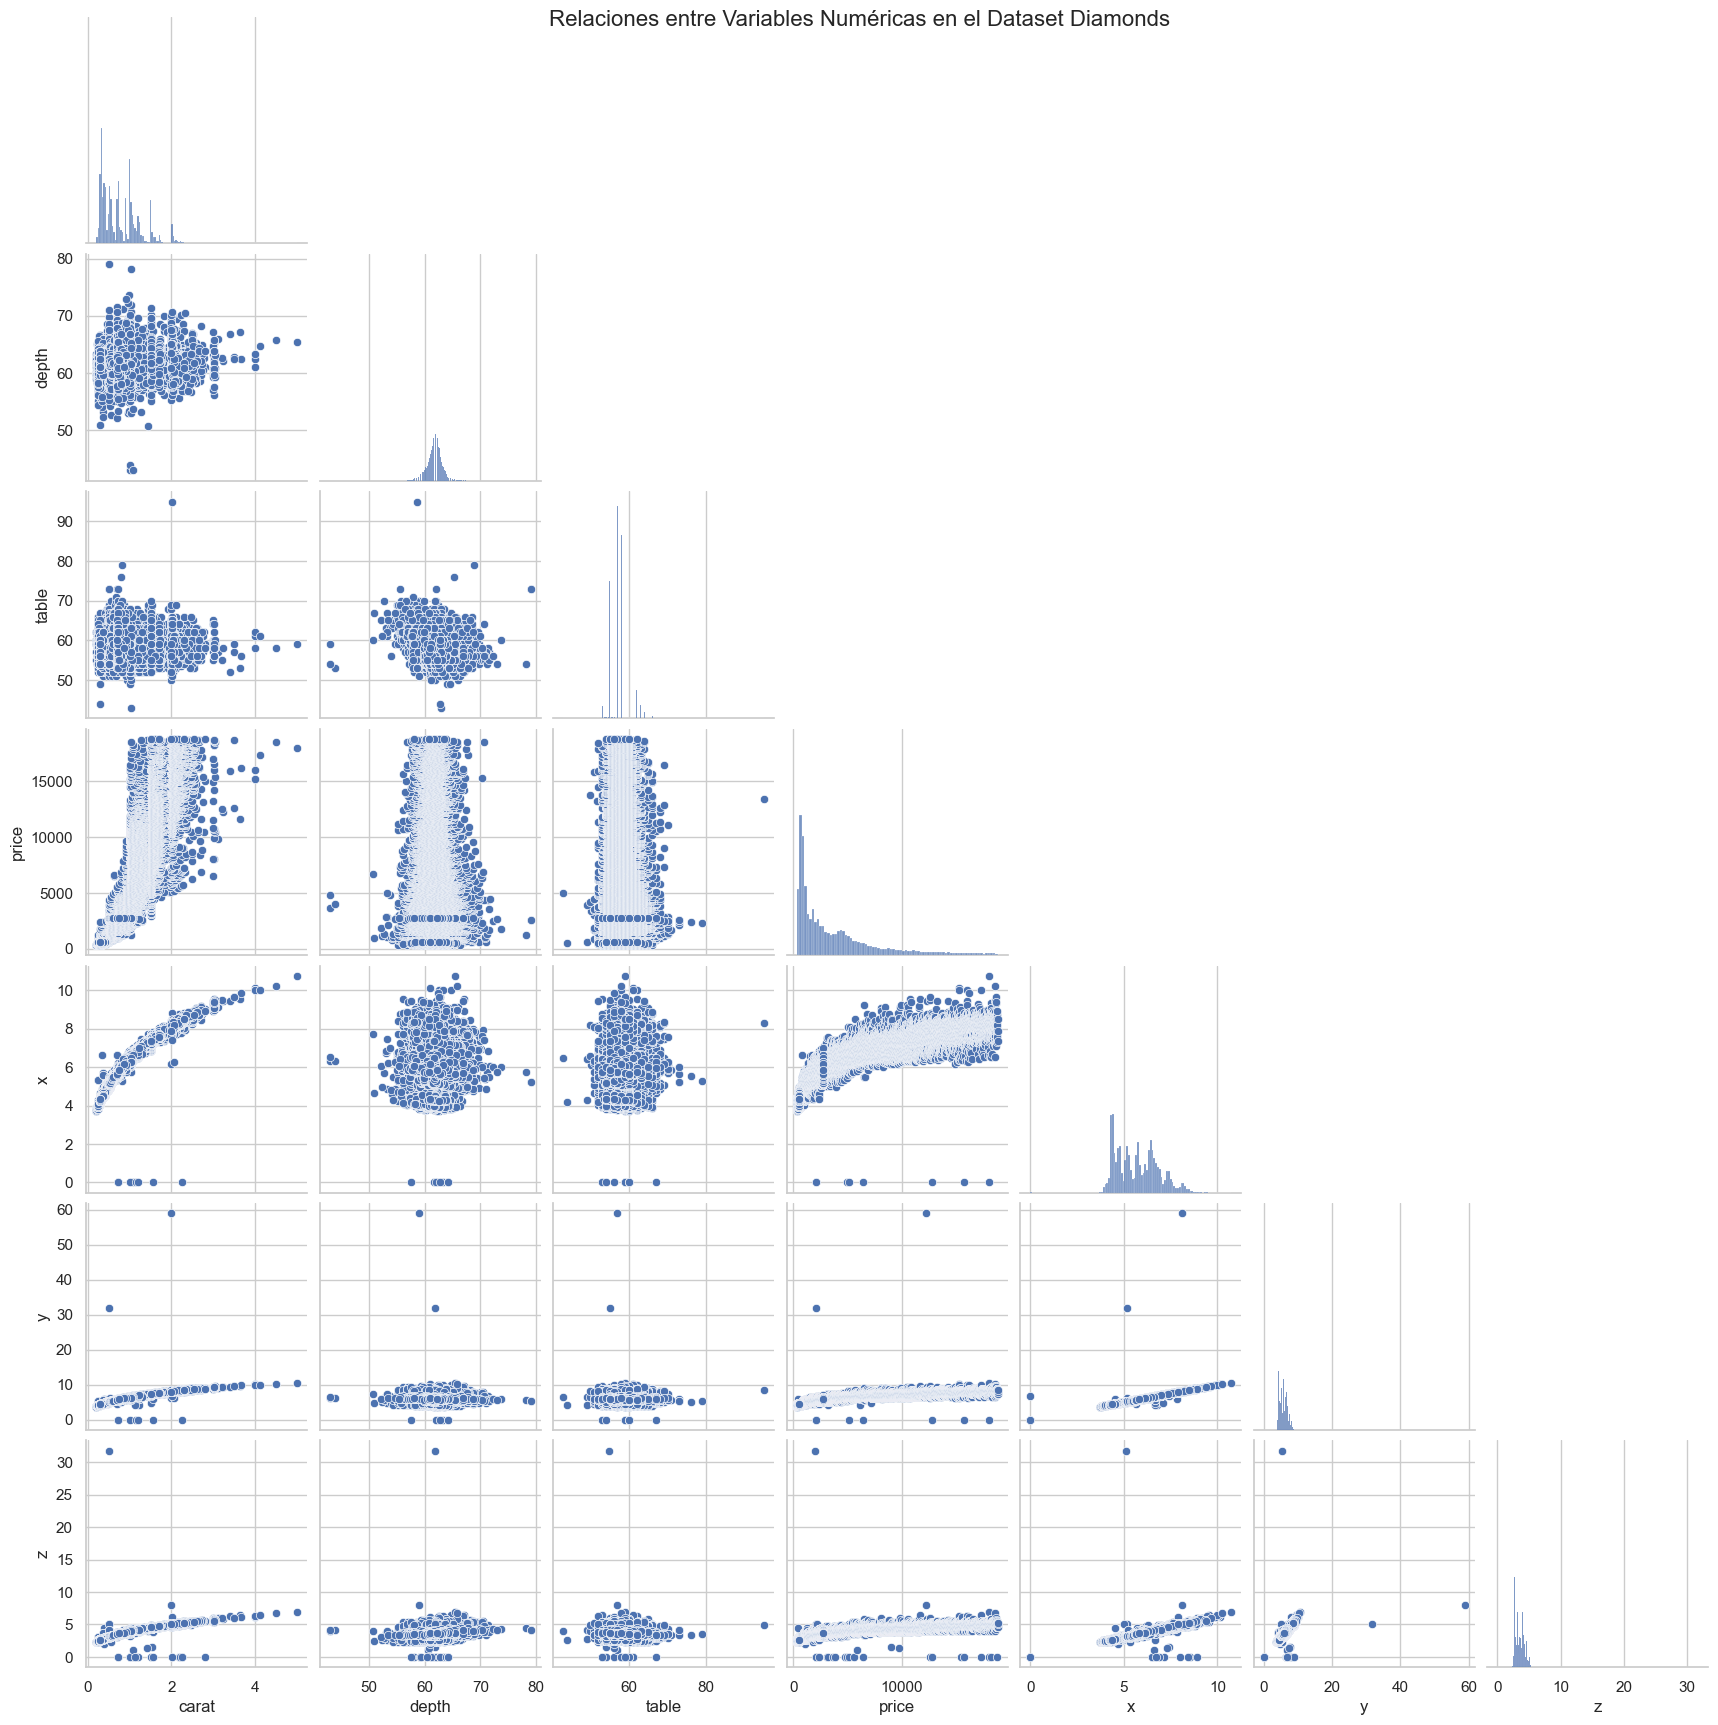

In [15]:
# Creando el pairplot para el dataset diamonds, Seaborn ignorará automáticamente las variables no numéricas
g = sns.pairplot(diamonds,
                corner=True)

# Mejorando el título con plt.subplots_adjust y plt.suptitle para el gráfico generado
g.fig.suptitle('Relaciones entre Variables Numéricas en el Dataset Diamonds',
               va='baseline',
               ha='center',
               fontsize=16);

6. Ajustar los estilos y temas de las visualizaciones para mejorar la estética y legibilidad

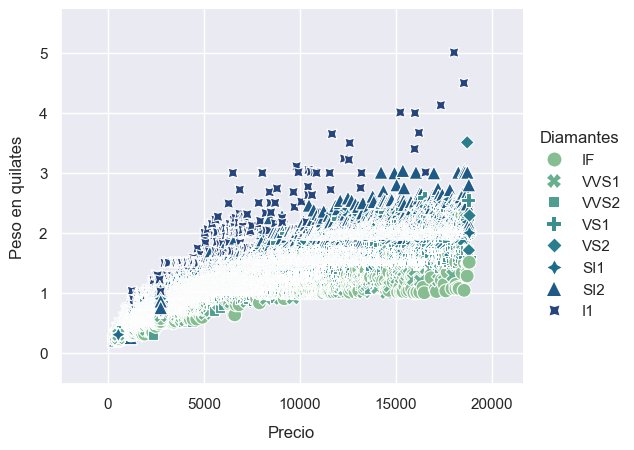

In [3]:
g = sns.relplot(data=diamonds,  # Asegúrate de que el nombre del dataset sea correcto
            x='price',
            y='carat',
           hue = 'clarity',
            style='clarity',
           palette='crest', #paleta de colores
           marker = '*', #es la forma que tendra el marcado
            s=100)
g.set_axis_labels('Precio',
                 'Peso en quilates',
                 labelpad= 10)
g.legend.set_title('Diamantes')
g.figure.set_size_inches(6.5,4.5)
g.ax.margins(.15)

<Axes: xlabel='price', ylabel='Count'>

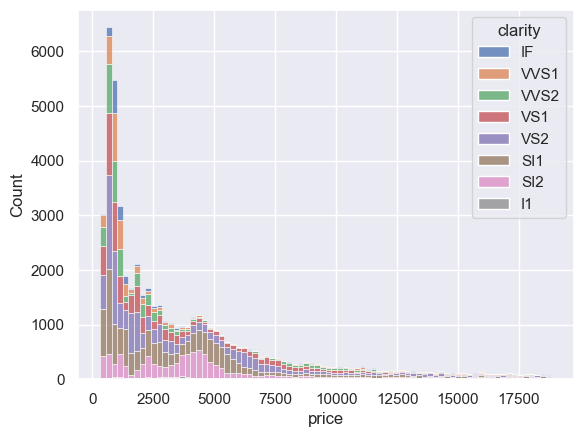

In [4]:
sns.histplot(data=diamonds,
            x='price',
            hue='clarity',
            multiple='stack')

7. Interpretar los gráficos generados, destacando hallazgos interesantes sobre los datos

In [ ]:
#Se encuentra en cada grafico